In [1]:
# 데이터셋 불러오기

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/vgames2.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)

# 결측치 확인 및 제거

print(df.isnull().sum())
df[['Year','Genre','Publisher']].dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

# 데이터 타입 확인 및 변환
print(df.dtypes)
df['NA_Sales'] = df['NA_Sales'].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(float)
df['EU_Sales'] = df['EU_Sales'].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(float)
df['JP_Sales'] = df['JP_Sales'].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(float)
df['Other_Sales'] = df['Other_Sales'].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(float)
df

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [2]:
!pip install plotly==4.10.0
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly
from plotly.graph_objs import Layout

     |████████████████████████████████| 13.0 MB 75 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [3]:
# 지역과 선호하는 게임 장르의 연관성

df_genre = df.drop(['Name','Platform','Year','Publisher'],axis=1)

df_genre2 = df_genre.groupby(by='Genre').sum().reset_index()
df_genre2 = df_genre2.loc[:, df_genre2.columns != 'Genre'].astype(float)


In [4]:
# 카이제곱 검정
from scipy import stats
from scipy.stats import chi2_contingency
import scipy as sp

chi2, p, dof, expected = stats.chi2_contingency(df_genre2)

print(f'게임 장르와 지역간의 카이제곱 검정 결과 P밸류가 {p}로 지역간의 장르 선호도에 차이가 있다.')

게임 장르와 지역간의 카이제곱 검정 결과 P밸류가 0.0로 지역간의 장르 선호도에 차이가 있다.


In [5]:
lab = ['Action',	'Adventure',	'Fighting',	'Misc',	'Platform',	'Puzzle',	'Racing',	'Role-Playing',	'Shooter',	'Simulation',	'Sports',	'Strategy']

fig3 = make_subplots(rows=2, cols=2,subplot_titles=("NA", "EU", "JP", "Other"),
                     specs=[[{"type": "domain"},{"type": "domain"}],[{"type": "domain"}, {"type": "domain"}]])

fig3.add_trace(go.Pie(values=df_genre2['NA_Sales'],labels = lab),
              row=1, col=1)
fig3.add_trace(go.Pie(values=df_genre2['EU_Sales'],labels = lab),
              row=1, col=2)
fig3.add_trace(go.Pie(values=df_genre2['JP_Sales'],labels = lab),
              row=2, col=1)
fig3.add_trace(go.Pie(values=df_genre2['Other_Sales'],labels = lab),
              row=2, col=2)
fig3.update_layout(height=1000, width=1200, title_text="Preference for game genre according to region")

fig3.show()

fig3.write_html("/content/sample_data/fig4.html")


In [6]:
df_genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.17,0.00,0.00,0.01
2,Adventure,0.00,0.00,0.02,0.00
3,Misc,0.04,0.00,0.00,0.00
4,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16593,Platform,0.15,0.04,0.00,0.01
16594,Action,0.01,0.00,0.00,0.00
16595,Sports,0.44,0.19,0.03,0.13
16596,Action,0.05,0.05,0.25,0.03


In [7]:
# 게임시장 규모

df_market = pd.DataFrame(data=[df_genre['NA_Sales'].sum(),df_genre['EU_Sales'].sum(),df_genre['JP_Sales'].sum(),df_genre['Other_Sales'].sum()])
df_market = df_market.T

sns.set(rc = {'figure.figsize':(15,10)})

df_market.columns = ['NA','EU','JP','Other']
df_market.index = ['Amount']
fig2 = px.bar(df_market,width=500, height=500,title='MARKET SIZE')
fig2.show()
fig2.write_html("/content/sample_data/fig2.html")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



연도별 최대 출고 게임량
1980s      66.0
1990s     303.0
2000s    1573.0
2010s    1431.0
2020s       1.0
dtype: float64
연도별 최대 출고 게임

1980s        Action
1990s        Sports
2000s        Action
2010s        Action
2020s    Simulation
dtype: object


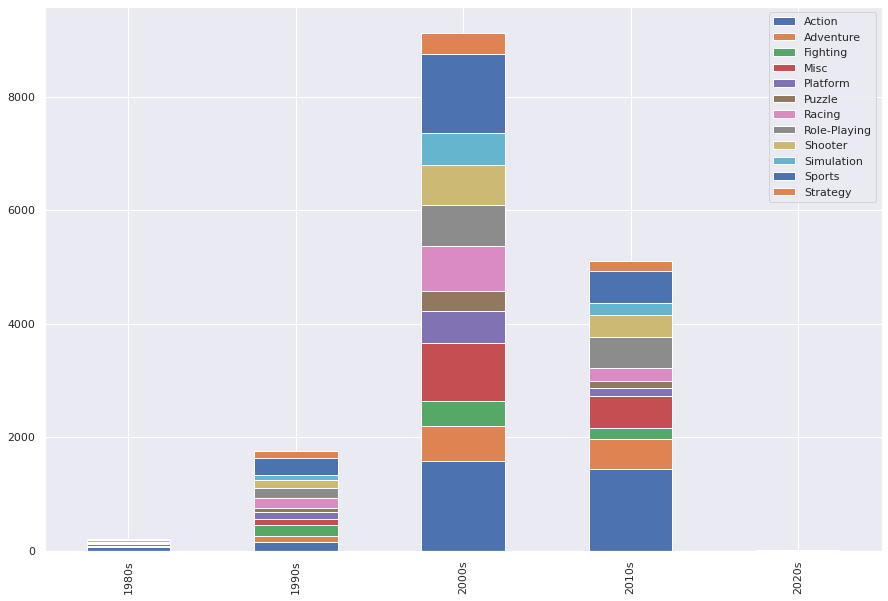

In [9]:
# 연도별 게임 트렌드

df['Year'] = df['Year'].dropna().astype(int)

df = df[df.Year > 100]
df.tail()

df_year = pd.crosstab(df.Genre,df.Year)
df_year = df_year.add_prefix('').reset_index().rename_axis(None, axis=1) 

df_year['1980s'] = df_year['1980']+df_year['1981']+df_year['1982']+df_year['1983']+df_year['1984']+df_year['1985']+df_year['1986']+df_year['1987']+df_year['1988']+df_year['1989']
df_year['1990s'] = df_year['1990']+df_year['1991']+df_year['1992']+df_year['1993']+df_year['1994']+df_year['1995']+df_year['1996']+df_year['1997']+df_year['1998']+df_year['1999']
df_year['2000s'] = df_year['2000']+df_year['2001']+df_year['2002']+df_year['2003']+df_year['2004']+df_year['2005']+df_year['2006']+df_year['2007']+df_year['2008']+df_year['2009']
df_year['2010s'] = df_year['2010']+df_year['2011']+df_year['2012']+df_year['2013']+df_year['2014']+df_year['2015']+df_year['2016']+df_year['2017']
df_year['2020s'] = df_year['2020']
df_year = df_year[['Genre','1980s','1990s','2000s','2010s','2020s']]

df_year = df_year.T
df_year.columns = ['Action',	'Adventure',	'Fighting', 'Misc',	'Platform',	'Puzzle',	'Racing',	'Role-Playing',	'Shooter',	'Simulation',	'Sports',	'Strategy']
df_year = df_year.drop(df_year.index[0])

df_year.plot.bar(stacked=True)

maxs=df_year.max(axis=1)
print("연도별 최대 출고 게임량")
print(maxs)
max_game = df_year.astype(int).idxmax(axis=1)
print('연도별 최대 출고 게임\n')
print(max_game)


In [10]:
df_year

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
1980s,66,2,4,8,32,19,8,9,30,3,22,0
1990s,158,96,191,115,124,71,179,171,136,86,303,121
2000s,1573,630,440,1015,559,356,791,728,712,547,1397,377
2010s,1431,538,194,557,151,113,232,550,390,207,567,167
2020s,0,0,0,0,0,0,0,0,0,1,0,0


In [11]:
# 출고량이 높은 게임 분석 및 시각화

df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
na_max = df.loc[df.NA_Sales.idxmax(), 'Name']
eu_max = df.loc[df.EU_Sales.idxmax(), 'Name']
jp_max = df.loc[df.JP_Sales.idxmax(), 'Name']
other_max = df.loc[df.Other_Sales.idxmax(), 'Name']
total_max = df.loc[df.Total_Sales.idxmax(), 'Name']
print('북미 최대 출고 게임 :',na_max,'\n유럽 최대 출고 게임 :',eu_max,'\n일본 최대 출고 게임 :',jp_max,'\n기타지역 최대 출고 게임 :',other_max,'\n합계 최대 출고 게임 :',total_max)


북미 최대 출고 게임 : Grand Theft Auto V 
유럽 최대 출고 게임 : FIFA 14 
일본 최대 출고 게임 : Pokemon FireRed/Pokemon LeafGreen 
기타지역 최대 출고 게임 : Fallout 3 
합계 최대 출고 게임 : Grand Theft Auto V


In [12]:
# 출고량 상위 10위 시각화
df.reset_index(drop=True,inplace=True)

labels = df.iloc[[10673,12321,567,1935,1928,1777,8353,9622,7697,6314],[0]]
label = np.array(labels['Name'].tolist())
print(labels)
fig4 = px.pie(df, values=df['Total_Sales'].nlargest(10),names=label,title='TOP 10 GAMES',width=1000, height=1000)

fig4.show()
fig4.write_html("/content/sample_data/fig3.html")

                                          Name
10673                       Grand Theft Auto V
12321                              Halo: Reach
567                              Mario Kart 64
1935                       Pokemon X/Pokemon Y
1928      The Legend of Zelda: Ocarina of Time
1777         Pokemon FireRed/Pokemon LeafGreen
8353   Pokémon Yellow: Special Pikachu Edition
9622                       Super Mario Bros. 3
7697                                   FIFA 14
6314                            Super Mario 64


In [13]:
# 휴대형 플랫폼과 거치형 플랫폼 출고량 분석

platform = df.drop_duplicates(['Platform'])
platform.reset_index(drop=True, inplace=True)
print('전체 플랫폼\n',platform['Platform'])
portable = ['DS','PSP','GBA','GB','PSV','WS','GG','3DS']
holder = ['Wii','PS3','PC','PS4','PS2','XB','X360','GC','2600','NES','SAT','N64','XOne','SNES','WiiU','DC','SCD','NG','TG16','3DO','PCFX']
print('휴대형 플랫폼\n',portable,'\n\n거치형 플랫폼\n',holder)

df_platform = df.groupby(by='Platform').sum().reset_index().drop(columns = ['Year','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'])
df_platform

df_platform_potable = pd.DataFrame(data=df_platform.iloc[[2,4,5,6,9,19,20,25]])
df_platform_potable.reset_index(drop=True,inplace=True)

df_platform_holder = df_platform.drop([2,4,5,6,9,19,20,25])
df_platform_holder.reset_index(drop=True,inplace=True)

platform_vs = [['Portable',df_platform_potable['Total_Sales'].sum()],['Holder',df_platform_holder['Total_Sales'].sum()]]

df_platform_vs = pd.DataFrame(platform_vs,columns = ['kind','Total_Sales'])
print(df_platform_vs)
fig5 = px.pie(df_platform_vs,values=df_platform_vs['Total_Sales'],names=df_platform_vs['kind'],width=600)
fig5.show()
fig5.write_html("/content/sample_data/fig5.html")


전체 플랫폼
 0       DS
1      Wii
2      PSP
3      PS3
4       PC
5       PS
6      GBA
7      PS4
8      PS2
9       XB
10    X360
11      GC
12     3DS
13    2600
14     SAT
15      GB
16     NES
17      DC
18     N64
19    XOne
20    SNES
21    WiiU
22     PSV
23     GEN
24     SCD
25      WS
26      NG
27    TG16
28     3DO
29      GG
30    PCFX
Name: Platform, dtype: object
휴대형 플랫폼
 ['DS', 'PSP', 'GBA', 'GB', 'PSV', 'WS', 'GG', '3DS'] 

거치형 플랫폼
 ['Wii', 'PS3', 'PC', 'PS4', 'PS2', 'XB', 'X360', 'GC', '2600', 'NES', 'SAT', 'N64', 'XOne', 'SNES', 'WiiU', 'DC', 'SCD', 'NG', 'TG16', '3DO', 'PCFX']
       kind   Total_Sales
0  Portable  2.936193e+07
1    Holder  1.110367e+08


In [14]:
df_platform_potable

,Platform,Total_Sales
0,3DS,6620238.96
1,DS,8080792.69
2,GB,3190251.04
3,GBA,8990303.67
4,GG,0.04
5,PSP,1690286.29
6,PSV,790060.14
7,WS,1.42


In [15]:
# 휴대형 플랫폼 내 출고량 분석

portable1= [['NINTENDO',df_platform_potable.iloc[0][1]+df_platform_potable.iloc[1][1]+df_platform_potable.iloc[2][1]+df_platform_potable.iloc[3][1]],
           ['SONY',df_platform_potable.iloc[5][1]+df_platform_potable.iloc[6][1]],
           ['OTHER',df_platform_potable.iloc[4][1]+df_platform_potable.iloc[7][1]]]
df_portable = pd.DataFrame(portable1,columns=['Company','Sales'])

fig6 = make_subplots(rows=1, cols=2,subplot_titles=("Analysis by Platform","Analysis by Company"),
                     specs=[[{"type": "domain"},{"type": "domain"}]])

fig6.add_trace(go.Pie(values=df_platform_potable['Total_Sales'],labels = df_platform_potable['Platform']),
              row=1, col=1)
fig6.add_trace(go.Pie(values=df_portable['Sales'],labels = df_portable['Company']),
              row=1, col=2)

fig6.show()
fig6.write_html("/content/sample_data/fig6.html")

In [16]:
df_platform_holder

,Platform,Total_Sales
0,2600,110086.37
1,3DO,0.10
2,DC,15.95
3,GC,1160195.13
4,GEN,260028.09
5,N64,14490202.43
6,NES,730249.27
7,NG,1.44
8,PC,2240251.31
9,PCFX,0.03


In [17]:
# 거치형 플랫폼 내 출고량 분석

holder1 = [['SONY',df_platform_holder.iloc[10][1]+df_platform_holder.iloc[11][1]+df_platform_holder.iloc[12][1]+df_platform_holder.iloc[13][1]],
          ['NINTENDO',df_platform_holder.iloc[3][1]+df_platform_holder.iloc[5][1]+df_platform_holder.iloc[6][1]+df_platform_holder.iloc[16][1]+df_platform_holder.iloc[18][1]+df_platform_holder.iloc[19][1]],
          ['SEGA',df_platform_holder.iloc[2][1]+df_platform_holder.iloc[4][1]+df_platform_holder.iloc[14][1]+df_platform_holder.iloc[15][1]],
          ['MS',df_platform_holder.iloc[20][1]+df_platform_holder.iloc[21][1]+df_platform_holder.iloc[22][1]],
          ['Other',df_platform_holder.iloc[0][1]+df_platform_holder.iloc[1][1]+df_platform_holder.iloc[7][1]+df_platform_holder.iloc[8][1]+df_platform_holder.iloc[9][1]+df_platform_holder.iloc[17][1]]]

df_holder = pd.DataFrame(holder1, columns=['Company','Sales'])
df_holder

fig7 = px.pie(df_platform_holder,names=df_platform_holder['Platform'],values=df_platform_holder['Total_Sales'], height=600)
fig7.show()
fig7.write_html("/content/sample_data/fig7.html")

fig8 = px.pie(df_holder, names=df_holder['Company'],values=df_holder['Sales'], height=600)
fig8.show()
fig8.write_html("/content/sample_data/fig8.html")
